<a href="https://colab.research.google.com/github/RachelRamirez/misclassification_matrix/blob/main/Load_and_Analyze_Results_of_pkl_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Results

I have a lot of pickle files.  Let's see if I can load them all up and put in a csv format.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
# !ls "/content/drive/My Drive/Con3"

path = "/content/drive/MyDrive/Con3/"

# file_name = "delete_later.pkl"

import pickle 

import os

dir = path

dict_of_run_files = {}

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # myfunction(file)
    with open(path + file, 'rb') as handle:
    # Call load method to deserialze
      dict_of_run_files[file] = pickle.load(handle)
      # list_of_files.extend(value for name, value in sorted(os.listdir(path)).items(), key=lambda item: item[0]) if name.startswith('run')
      count+=1 
      # print(unpickled_object == variable_to_be_deleted)
      # print(count, ". ", file, " was saved to dict_of_run_files. ")

      

How to get into the "dict_of_run_files" variable and dig out each of the contents we need in each pickle file.

We need at least the following information in a dataframe:

UniqueID | Date_Time |  Run | Rep | Lambda = (i,j,k) | Num of Epochs = (E1, E2, E3) | EarlyStop Patience = (P1, P2, P3) | Train/Val Accuracy | # of Misclassifications of [9t, 4p] | # Reverse Misclassifications | Final CM | Seed1 | Seed2 
-- | -- | --| --| --| --| --| --| -- | --| --| --| --
int | string | int | int | tuple | tuple | tuple | float | int | int | (1,100) (1,100), (1,100) | int | int





In [4]:
# column_name_list = ["UniqueID" , "Date_Time" ,  "Run" , "Rep" , "Lambda = (i,j,k)" , "Epochs = (E1, E2, E3)" , "EarlyStop Patience = (P1, P2, P3)" , "Val Accuracy" , "# of Misclassifications of [9t, 4p]" , "# Reverse Misclassifications" ,"Final CM", "Seed1" , "Seed2" ]


Unique ID can come later from just the order of the index or the key-name-of the file since each one has a unique last file_name.

Date_Time can come from the last part of the file name string, although in hind sight would have been nice to save to the admin key

Run really can't be a trusted Run Number anymore since I had some trouble with it, but can be cleaned up based off the lambda-epochs-patience values.

Rep is Rep specified in the Dictionary.



In [5]:
# dict_of_run_files.keys()
# An example of a key is 'run1_rep_1_w[9,4]_L_1_1_1_E_5_5_25_P_0_0_25__2023_03_09_1329_.pkl'

import pandas as pd
data = pd.DataFrame()

# I later had the great idea of adding an admin file so some files have it some don't.

count = 0
for file in os.listdir(path):
  if file.endswith(".pkl") and file.startswith("run"):
    # for key in dict_of_run_files.keys():
      try:
        dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]['admin']
      except:
        print(count, "No Admin Key")
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      else:
      # for variable in list(("lambda1", "lambda2", "lambda3")):
      #   # print(variable)
        data[count] = [file, dict_of_run_files[file][list(dict_of_run_files[file].keys())[0]]]
      count+=1
# print(data.head)

data_transpose = data.transpose()
del(data)

# data_transpose.columns

# The try block lets you test a block of code for errors.
# The except block lets you handle the error.
# The else block lets you execute code when there is no error.
# The finally block lets you execute code, regardless of the result of the try- and except blocks.

# #This file does:
# print("Run:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['run'])
# print("Rep:" , dict_of_run_files['run23_rep_1_w[9,4]_L_100_1_100_E_5_5_25_P_0_0_0__2023_03_09_1434_.pkl'][(23,1)]['admin']['rep'])

#so when filling in my dataframe with information I may need to use a for loop with an try-exception line.



0 No Admin Key


<ipython-input-5-c43dd81e961f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for file in os.listdir(path):
<ipython-input-5-c43dd81e961f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  for file in os.listdir(path):
<ipython-input-5-c43dd81e961f>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


In [6]:
# # data_transpose[0] #the "0" is the first column which is now the filename
# data_transpose[1][0] #index 0 of column 1 is all the information saved from the pickle file, minus the "key". it still appears to be in dictionary format
# data_transpose[1][0]["First"]  # this is the "first" training phase history
data = pd.DataFrame()
data['categorical_accuracy'] = np.ones((2,2)).tolist()
data['val_categorical_accuracy'] =np.ones((2,2)).tolist()
data['loss'] = np.ones((2,2)).tolist()
data['val_loss'] = np.ones((2,2)).tolist()
data['4T_9P'] = np.ones((2,2)).tolist()
data['9T_4P'] =np.ones((2,2)).tolist()
data['3ConfusionMatrices'] =np.ones((2,2)).tolist()



# Create a list of columns for the data-frame Data where you can no longer subset into smaller keys
# list_of_columns_for_data = []
#gather all the unique keys in the many nested dictionary files to define a new dataframe with those columns
for row in range(0,len(data_transpose)):
  data.at[row, 'filename'] = data_transpose[0][row]
  for column in list(data_transpose[1][row].keys()):
    try:
      len(list(data_transpose[1][row][column].keys()))
    except AttributeError:
      # print(f'data_transpose[1][{row}][{column}] has no keys')
      # list_of_columns_for_data.append(column)
      if(column=='3ConfusionMatrices'):
        data.at[row, column] = pd.DataFrame([data_transpose[1][row][column].tolist()])
      else:
        data.at[row, column] = data_transpose[1][row][column]


    else:
      # print(f'data_transpose[1][{row}][{column}] has keys')

      for subcolumn in list(data_transpose[1][row][column].keys()):
        # list_of_columns_for_data.append(subcolumn)
        # print(f'key: subcolumn {subcolumn}')
        try:
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        except KeyError:
          # print("KeyError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except TypeError:
          # print("TypeError")
          data.at[row, subcolumn] = pd.DataFrame([data_transpose[1][row][column][subcolumn].tolist()])
        except ValueError:  #categorical accuracy causes a value error because you can't set the dataframe value to an array
          # print("ValueError")
          data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]
        # data.at[row, subcolumn] = data_transpose[1][row][column][subcolumn]

        #I also want the last value listed in '4T_9P', '9P_4P', 'val_loss',  'val_categorical_accuracy',  'loss',  'val_loss',
        if(subcolumn == '4T_9P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
          
        elif(subcolumn == '9T_4P' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_categorical_accuracy' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])
        elif(subcolumn == 'val_loss' ):
          # print(str(subcolumn)," last_value is " , data_transpose[1][row][column][subcolumn][-1])
          new_column_name = str(subcolumn) + "_last_value"
          data.at[row, new_column_name] = data_transpose[1][row][column][subcolumn][-1]
          new_column_name2 = str(subcolumn) + "_length"
          data.at[row, new_column_name2] = len(data_transpose[1][row][column][subcolumn])

        # print(subcolumn)

# # data



# #Create a column with just the last confusion matrix, the last values of 9t_4p, and 4t_9p
# len(data['categorical_accuracy'][0])  #Column 'Categorical Accuracy', Row0, shows 35 values
# data['categorical_accuracy'][0][-1]
# data['val_categorical_accuracy'][0][-1]
# len(data['9T_4P'][0])  #The array of values for '9T_4P' is length 35, and the last value is 12 
# data['9T_4P'][0][-1]  # to get the last value for row 0
 
    
# data_csv = data.to_csv("data.csv")
  
# from google.colab import files
# files.download('data.csv')



12

In [7]:
# len(data_transpose)
data['3ConfusionMatrices'][0]

,0,1,2
0,"[704, 0, 1, 0, 0, 3, 7, 2, 2, 0, 0, 833, 4, 2,...","[710, 0, 1, 0, 0, 3, 3, 1, 1, 0, 0, 836, 3, 3,...","[706, 0, 2, 1, 0, 4, 2, 3, 1, 0, 0, 837, 4, 3,..."


In [8]:
data_to_save = pd.DataFrame()
data_to_save = data[['lambda1',	'lambda2',	'lambda3',	'epochs1',	'epochs2',	'epochs3',	'es1',	'es2',	'es3', '9T_4P_last_value',	'4T_9P_last_value', 'val_categorical_accuracy_last_value', '3ConfusionMatrices', 'filename'	]].copy()

for row in range(len(data_to_save)):
  # print(row)
  try:
    data_to_save.loc[row, 'lambdacombo'] = str(int(data_to_save.loc[row, 'lambda1'])) +"-"+ str(int(data_to_save.loc[row, 'lambda2'])) +"-"+ str(int(data_to_save.loc[row, 'lambda3']))
  except ValueError:
    data_to_save.loc[row, 'lambdacombo'] = str((data_to_save.loc[row, 'lambda1'])) +"-"+ str((data_to_save.loc[row, 'lambda2'])) +"-"+ str((data_to_save.loc[row, 'lambda3']))                               
                                          
                                          # .reset_index(drop=True)) + str(data_to_save['lambda2'].reset_index(drop=True))  + str(data_to_save['lambda3'].reset_index(drop=True))

 
    
data_csv = data_to_save.to_csv("data.csv")
  
from google.colab import files
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
data_to_save.head()

data_to_save.lambdacombo.value_counts().index

Index(['1-1-1', '1-1000-1', '1-100-100', '1-100-1000', '1-1000-100',
       '1-1-1000', '1-1-100', '100-1-1', '100-1-100', '1-100-1', '1-1000-1000',
       '100-1-1000', '100-100-1', '100-1000-100', '100-1000-1', '100-100-100',
       '100-100-1000', '100-1000-1000', '1000-1-1', '1000-1-100',
       '1000-1-1000', '1000-100-1', '1000-1000-100', '1000-100-100',
       '1000-100-1000', '1000-1000-1', '1000-1000-1000', 'nan-nan-nan'],
      dtype='object')

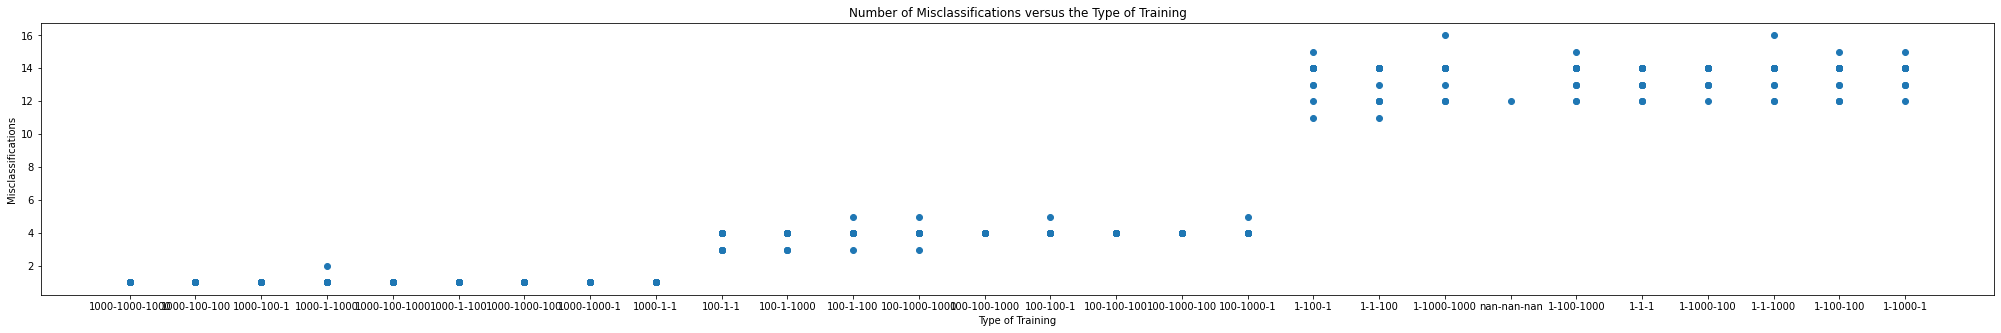

In [39]:
# importing the required module
import matplotlib.pyplot as plt

data_to_save.sort_values('9T_4P_last_value', inplace=True)

# # x axis values
x = data_to_save['lambdacombo']
# corresponding y axis values
y = data_to_save['9T_4P_last_value']

plt.figure(figsize=(35,5))
# plotting the points 
plt.scatter(x, y)
  
# naming the x axis
plt.xlabel('Type of Training')
# naming the y axis
plt.ylabel('Misclassifications')
  
# giving a title to my graph
plt.title('Number of Misclassifications versus the Type of Training')
  
# function to show the plot
plt.show()

############################# 
# fig = plt.figure(figsize =(10, 7))
# boxplot_data = []
# boxplot_x = []

# for unique_name in (data_to_save.lambdacombo.value_counts().index):
#   # print(unique_name)
#   boxplot_data.append(data_to_save[data_to_save.lambdacombo==unique_name]['9T_4P_last_value'])
#   boxplot_x.append(unique_name)


# # # Creating plot
# plt.xlabel(boxplot_x)
# plt.boxplot(boxplot_data)
# plt.show()

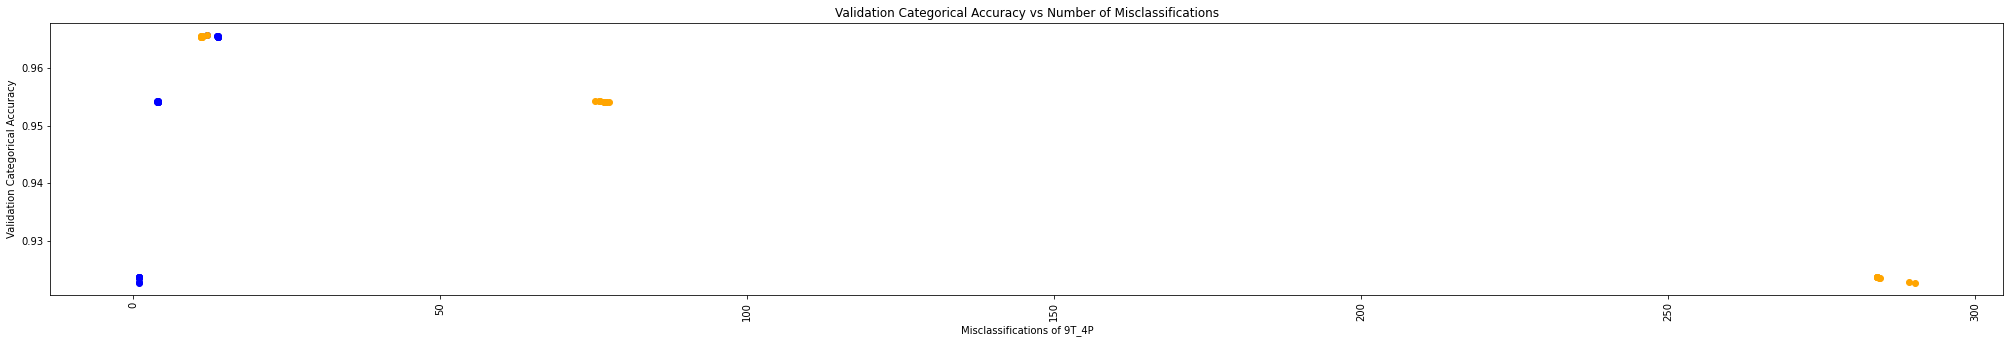

In [63]:
# data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value'].describe()
data_combo_summary = data_to_save.groupby('lambdacombo')['9T_4P_last_value','val_categorical_accuracy_last_value', '4T_9P_last_value'].mean()


data_combo_summary.sort_values('9T_4P_last_value', inplace=True)

# # x axis values
# x = data_combo_summary.index
# corresponding y axis values
x = data_combo_summary['9T_4P_last_value']
x2 = data_combo_summary['4T_9P_last_value']

y = data_combo_summary['val_categorical_accuracy_last_value']


plt.figure(figsize=(35,5))
plt.xticks(rotation=90)

# plotting the points 
plt.scatter(x, y, c = "b")
plt.scatter(x2,y, c="orange")



# # First Scatter plot
# plt.scatter(x1, y1, c ="r",linewidths = 2, marker ="D", edgecolor ="b", s = 70, alpha=0.5)

# #Second Scatter plot
# plt.scatter(x2, y2, c ="k",linewidths = 2,marker ="p",edgecolor ="red",s = 150,alpha=0.5)

  
# # naming the x axis
plt.xlabel('Misclassifications of 9T_4P')
# # naming the y axis
plt.ylabel('Validation Categorical Accuracy')
  
# giving a title to my graph
plt.title('Validation Categorical Accuracy vs Number of Misclassifications')
  
# function to show the plot
plt.show()

In [ ]:
#Save a file to myDrive/con3

# Analyze 

\\


In [ ]:
# import numpy as np
# import pandas as pd
# empty_cm = np.zeros((10,10))  
# empty_cm=pd.DataFrame(empty_cm)

# empty_cm.columns = ['0p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p']
# empty_cm.index = ['0t', '1t', '2t', '3t', '4t', '5t', '6t', '7t', '8t', '9t']

# # print(myvar_cm_average)

# empty_cm_array = np.asarray(empty_cm)
# empty_cm_array_1_100 = np.reshape(empty_cm_array,(1,100))
# # print(cm_average_array)

# df = empty_cm
# df_new = pd.DataFrame(empty_cm_array_1_100,  columns=pd.MultiIndex.from_product([ df.index,df.columns]))
# df_new.columns.to_flat_index()
# df_new.columns   = ['_'.join(col) for col in df_new.columns.values]

# # Now convert combined_cms of size 30x100 to a panda dataframe
# cms_df = pd.DataFrame(combined_cms, columns=[df_new.columns], index=["First", "Second", "Third"])

# cms_df

# for run in runs:
#   for rep in reps:
#     for phase in phases:
#       pd.DataFrame(combined_history_dictionary[run,rep]["3ConfusionMatrices"], columns=[df_new.columns], index=["First", "Second", "Third"])

In [ ]:
# combined_cms[0,]

In [ ]:
# combined_cms_df["9t_4p"]

In [ ]:
# np.average(combined_cms_df["9t_4p"])

In [ ]:
# csv_filename = file_name[:-4] + ".csv"

# combined_cms_df.to_csv(csv_filename)
# # 

# from google.colab import files
# files.download(csv_filename )

# print("Downloading ", csv_filename , " of shape ", combined_cms_df.shape)

In [ ]:
# df = pd.DataFrame(sum(var)/len(var), columns=["Values"]) 
# # print(df)

# df.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# (df.sort_values(by="Values", ascending=False)[0:20])


# df_sorted = df.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal


# df_sorted.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# import math

# print("On average...")
# print("Num 1 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[0])/10), " as a ", df_sorted["Values"].index[0]%10, "  (", (df_sorted["Values"].values[0]), " times)" )
# print("Num 2 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[1])/10), " as a ", df_sorted["Values"].index[1]%10, "  (", (df_sorted["Values"].values[1]), " times)" )
# print("Num 3 misclassifications are misclassifying a ", math.floor((df_sorted["Values"].index[2])/10), " as a ", df_sorted["Values"].index[2]%10, "  (", (df_sorted["Values"].values[2]), " times)" )




In [ ]:
# df_percents = pd.DataFrame( ((sum(var)*100/len(var)).reshape((10,10))/truth_num_per_category).reshape((100)), columns = ["Values"])


# df_sorted_percents = df_percents.sort_values(by="Values", ascending=False)[10:]  #the top 10 are usually diagonal

# df_sorted_percents.style.format({
#   'Values': lambda val: f'{val:,.2f}',
# })

# print("On average .. ")
# print("Num 1 percent misclassifications", math.floor((df_sorted_percents["Values"].index[0])/10), " as ", df_sorted_percents["Values"].index[0]%10, (df_sorted_percents["Values"].values[0]), " percent" )
# print("Num 2 percent misclassifications", math.floor((df_sorted_percents["Values"].index[1])/10), " as ", df_sorted_percents["Values"].index[1]%10,  (df_sorted_percents["Values"].values[1]), " percent" )
# print("Num 3 percent misclassifications", math.floor((df_sorted_percents["Values"].index[2])/10), " as ", df_sorted_percents["Values"].index[2]%10, (df_sorted_percents["Values"].values[2]), " percent" )




